## Overview

**Markov Chain Monte Carlo (MCMC)** samples from the high-dimensional, complex distributions by generating a Markov chain over $(\Theta, X)$, $\{\Theta^{(g)}, X^{(g)}\}$, whose equilibrium distribution is $p(\Theta,X|Y)$. The Monte Carlo method uses these samples for 
- numerical integration for parameter estimation, 
- state estimation, 
- model comparison,
- quantifying estimation risk (powered by Bayesian statistics).

## MCMC Simulation

More specifically, the way that MCMC draws samples from the posterior distribution $p(\Theta,X|Y)$ is to draw conditional posteriors, either single-dimensional or multi-dimensional at a time (relating to handling curse of dimensionality and block updates - more on this later). Note that the sequence is not i.i.d., but instead ergodic, and thus LLN and CLT also holds, which forms the base for statistical inference:

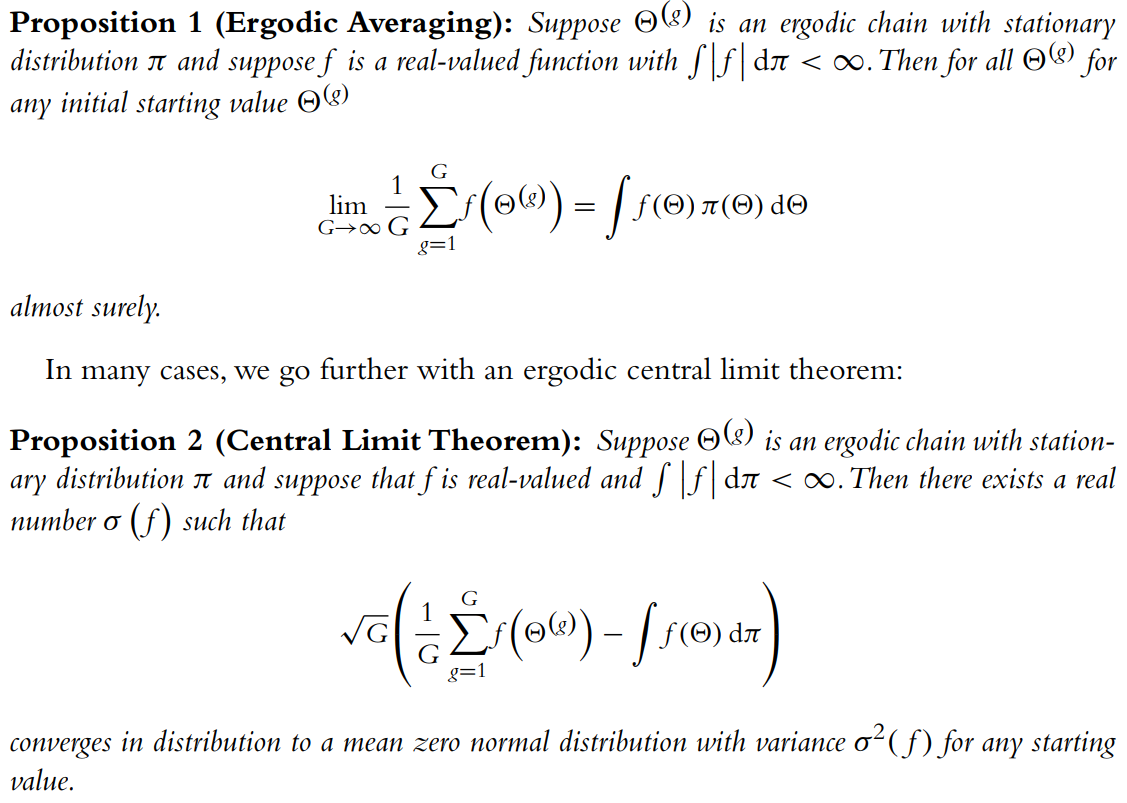

MCMC algorithms generically consist of two different steps. 
- If the complete conditional distribution is known in closed form and can be directly sampled, the step in the MCMC algorithm is known as a **“Gibbs”** step. If all the conditionals can be directly sampled, the algorithm is referred to as a **“Gibbs sampler”**. 
- In many situations, one or more of the conditionals cannot be directly sampled and methods known as **“Metropolis-Hastings algorithms”** apply.These algorithms sample a candidate draw from a proposal density and then accept or reject the candidate draw based on an acceptance criterion. 

## Bayesian Inference

The **marginal likelihood function**, $p(Y|\Theta)$, which integrates the latent variables from the augmented likelihood:
\begin{align}
p(Y|\Theta)=\int p(Y,X|\Theta)dX=\int p(Y|X.\Theta)p(X|\Theta)dX.
\end{align}

The **prior distribution** serves important economic and statistical roles.
- Economically, it allows the researcher to incorporate nonsample information in a consistent manner.
- Statistically, the prior can impose stationarity, rule out near unit-root behavior, or separate mixture components.

The **marginal parameter posterior** quantifies the estimation risk of the parameter.
\begin{align}
p(\Theta_{i}|Y)=\int p(\Theta_i,\Theta_{(-i)},X|Y)dXd\Theta_{(-i)}
\end{align}

The **state estimation** $t=1,\cdots,T$:
- filtering: $p(X_t|Y_t)$
- forecasting: $p(X_{t+1}|Y_{1:T})$
- smoothing: $p(X_t|Y_{1:T})$

The **model specification** $p(Y|M)$ where $M$ is a model can be used to compare models, in the fashion of **Bayes factor** and **Bayes factor**.

## Methods and Thoery of MCMC

### Clifford-Hammersly Theorem

The general version of the Clifford–Hammersley theorem provides conditions for when a set of conditional distributions characterizes a unique joint distribution.  A proof of the Clifford–Hammersley theorem based on the Besag formula uses the insight that, e.g. for any pair $(\Theta_0, X_0)$ of points, the joint density $p(\Theta,X|Y)$ is determined up to a constant of proportinoality as
\begin{align}
\frac{p(\Theta,X|Y)}{p(\Theta_0,X_0|Y)}=\frac{p(\Theta|Y,X_0)p(X|\Theta,Y)}{p(\Theta_0|Y,X_0)p(X_0|\Theta,Y)},
\end{align}
as long as positivity condition is satisfied (probably just to make sure we are not dividing by zero).

### Metropolis-Hastings Steps

The Metropolis–Hastings algorithm then samples iteratively. It first draws a candidate point that will be accepted or rejected based on the acceptance probability - note that when it rejects, the Markov chain just does not move forward: that is, set $\Theta^{(g+1)}=\Theta^{(g)}$.

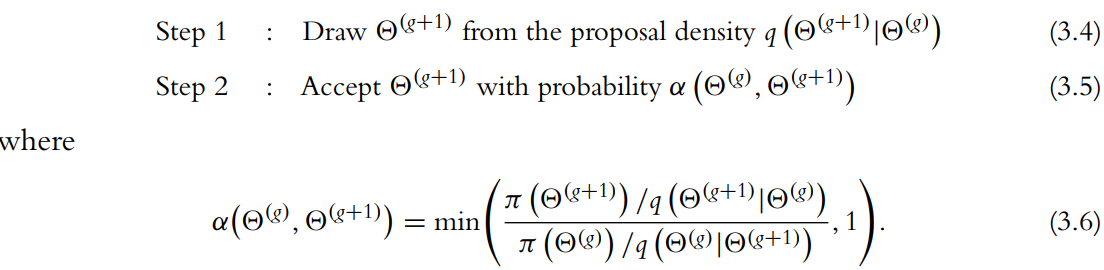

Several notes:
- The **Gibbs sampler** is just a special case of MH, in that proposal density is just the conditional posterior, and the acceptance probability is simply $1$: this works when the **conditional posterior is known in closed form**. In this sense, Metropolis-Hastings **greatly extends the applicable cases for MCMC**: we can always resort to Metropolis-Hastings when the conditional posterior is not known. 
- The **Metropolis–Hastings algorithm allows the functional form of the density to be nonanalytic**, for example, which occurs when pricing functions require the solution of partial or ordinary differential equations. **One only has to evaluate the ratio of the true density $\pi(\cdot)$ at two given points, i.e. one does not have to know the normalizing constants**.
- **There is an added advantage when there are constraints in the parameter space – one can just reject these draws**. Alternatively, sampling can be done conditional on specific region. This provides a convenient approach for analyzing parameter restrictions imposed by economic models.

### Convergence Theory

#### Convergence of Markov Chains

- First we need to prove Metropolis-Hastings steps give rise to an invariant distribution (recall that Gibbs sampler is just a special case). For that we can check the **detailed-balance** condition. The by-product is we know the Markov chain is also time-reversible.

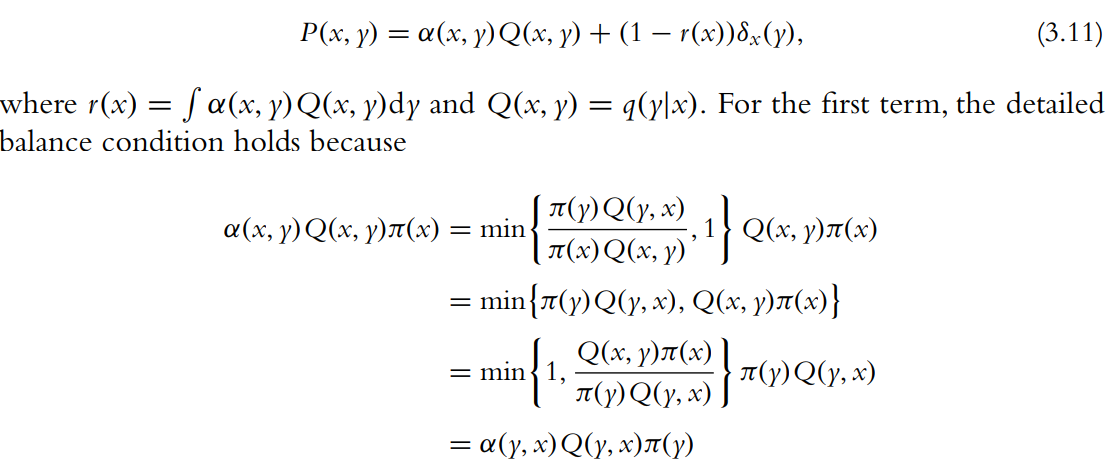

- Then to prove the invariant distribution is unique and hence is the limiting distribution, we need to further prove **$\pi$-irreducibility** and **aperiodic**.
  - In the case of the Gibbs sampler,these conditions can be significantly relaxed to the assumption that $x$ and $y$ communicate, which effectively means that starting from x one can eventually reach state y.
  - To verify aperiodicity, one can appeal to a theorem in Tierney (1994) which states that all **$\pi$-irreducibility** Metropolis algorithms are Harris recurrent. 
  
- Some results for the rate of convergence
  - Roberts and Polson (1994) prove that all Gibbs samplers are geometrically convergent under a minorization condition.
  - Mengersen andTweedie (1996) show that a sufficient condition for the geometric ergodicity of independence Metropolis–Hastings algorithms is that the tails of the proposal density dominate the tails of the target, which requires that the proposal density $q$ is such that q/π is bounded over the entire support.
  - Mengersen and Tweedie (1996) show that random-walk algorithms converge at a geometric rate if the target density has geometric tails.
  - Frieze et al. (1994) show that MCMC algorithms that draw from log-concave distributions generate polynomial convergent algorithms. Although this assumption may seem restrictive, Polson (1996) shows that data augmentation can be used to convert a nonlog-concave sampling problem into a log-concave problem.
  

### Practical Suggestions
- The **trace plots**, plots of $\Theta^{(g)}$ versus $g$, show the history of the chain and are useful for diagnosing chains that get stuck in a region of the state space.
- It is also common to analyze the **correlation structure of draws** by computing the autocorrelation function (ACF). Again, one needs to take care when interpreting these ACF’s,as algorithms that have low autocorrelation may never converge. Another thing that people do to mitigate serial correlation is to **take samples every few steps apart**.
-  Starting from points $\Theta^{(0)}$, **possibly at random**, the general methodology is to discard a **burn-in** period to reduce the influence of the choice of starting point.
- In building the MCMC algorithms, first program a **simple version of the model** and, after verifying that it works, add additional factors. 
    - For instance, though introduction of additional latent state variables, known as **data augmentation**, can dramatically increase the rate of convergence. One must be careful, however, as the introduction of state variables can also degrade the provable convergence rate, due to difficulty of convergence for higher dimension. Thus You can start by **supplying the true latent variables and only learn one or two target variables**.
- Though Clifford-Hammersly breaks high-dimensional distribution into single-dimensional conditionals, in many models, state variables are persistent which implies that the correlation between neighbor states is typically high and the gains from **drawing these states together in a block** can be significant.
- **Simulation studies**, whereby artificial data sets are simulated and the efficiency and convergence of the algorithm can be checked, are always recommended. Simulation studies also allow researchers to study the role of prior distributions. Because state space models often have subtle identification issues, **simulating data sets from alternative parameter values and for different priors provide a means to quantify what role, if any, the prior distributions play**.
- Algorithms that are **provably geometric convergent** are preferred to those that are not, though in practice this is not always achievable.
- Metropolis step is properly **centered, scaled and has sufficiently fat tails**. Also, empirical studies show that it is best to keep acceptance rate in the range of 0.2-0.5. 

## References
- [< Handbook of Financial Econometrics >](https://www.evernote.com/shard/s191/nl/21353936/3e7ec6fc-3842-1ad7-5b1a-7f9c8ef7e22a?title=Handbook%20of%20Financial%20Econometrics), Chapter 13.